**QUESTION:**

In this problem, a simulated data will be generated and then the K-means clustering on the data is performed.

a) Generate a simulated data set with 20 observations in each of 3 classes (i.e., 60 observations total), and 50 variables. (Make sure to do mean shifting of the data so that there are 3 distinct classes).

b) Perform K-means clustering of the observations with K=3. How well do the clusters that you obtained compared with the true labels?

c) Perform K-means clustering with K= 2 and K=4, describe your results.

d) Perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [83]:
# Importing the necessary libraries

from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

To generate a simulated data set with 20 observations in each of 3 classes (i.e., 60 observations total), and 50 variables, we can use 'make_blobs' function.

In [90]:

X, y = make_blobs(n_samples=60, n_features=50, centers=3, cluster_std=0.5,shuffle=True, random_state=0)

# Mean shifting the data by adding some random numbers

X = X + np.random.normal(loc=0, scale=6, size=X.shape)

print(X)
print(X.shape)

[[  9.50412024   1.79854918   6.0874455  ... -15.00499191  -1.96150453
   -2.65512961]
 [  1.95676351 -10.44058917   1.18388764 ...  -4.79730618   2.44964831
  -18.03067025]
 [  5.10663332  14.94052599   9.26545702 ... -12.83811283  -4.55354922
   -5.68304517]
 ...
 [  7.33364006   2.82551042   8.63516932 ... -17.672044     8.24764261
  -12.71082647]
 [  2.50163329  -3.94301465   3.2625788  ... -13.60257116  -3.19928855
    3.00585627]
 [  2.46639313  -2.6923816   11.03753662 ... -10.9957676    1.45581914
   -9.91097916]]
(60, 50)


In [91]:
# Applying KMeans algorithm and finding the accuracy of the prediction on clusterd data

kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=10, tol=1e-04, random_state=0)
y_pred = kmeans.fit_predict(X)
accuracy = accuracy_score(y, y_pred)
print(y.shape)
print("Accuracy:", accuracy)

(60,)
Accuracy: 1.0


Using the preceding code, we set the number of desired clusters to 3; specifying the number of clusters is one of the limitations of k-means. We set n_init=10 to run the k-means clustering algorithms 10 times independently, with different  random centroids to choose the final model as the one with the lowest SSE. Via the max_iter parameter, we specify the maximum number of iterations for each single run (here, 10). Note that the k-means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reached. However, it  is possible that k-means does not reach convergence for a particular run, which can be problematic (computationally expensive) if we choose relatively large values for max_iter. One way to deal with convergence problems is to choose larger values for tol, which is a parameter that controls the tolerance with regard to the changes in the within-cluster SSE to declare convergence. In the preceding code, we chose a tolerance of 1e-04 (=0.0001).

K-means clustering with K= 2

In [92]:
kmeans = KMeans(n_clusters=2, init='random', n_init=10, max_iter=10, tol=1e-04, random_state=0)
y_pred = kmeans.fit_predict(X)
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


K-means clustering with K=4

In [93]:
kmeans = KMeans(n_clusters=4, init='random', n_init=10, max_iter=10, tol=1e-04, random_state=0)
y_pred = kmeans.fit_predict(X)
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5333333333333333


From the above output, we can say that the accuracy decreased when K set to 2 and 4. It is because of the overfitting of data when we increase the number of clusters. If the number of clusters decreases then assignment of labels while predicting decreases leading to the decrease in accuracy.

The optimal number of clusters can be estimated using a technique called the elbow method. The elbow method plots the value of the cost function produced by different values of K. As K increases, the average distortion will decrease; each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements to the average distortion will decline as K increases. The value of K at which the improvement to the distortion declines the most is called the elbow. Let's use the elbow method to choose the number of clusters for our data.

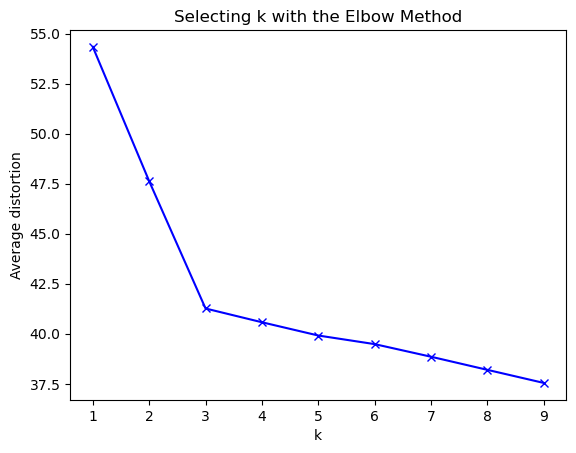

In [94]:
K = range(1, 10) 
meandistortions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k')
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

The above figure shows the elbow plot for the data. From this, we can see that 
the rate of improvement to the average distortion declines the most when adding a 
fourth cluster, that is, the elbow method confirms that K should be set to three for 
this dataset.

we first apply the z-score normalization to the data using StandardScaler and obtain the standardized data X_scaled. We then divide X_scaled by the standard deviation of each column to ensure that each variable has a standard deviation of exactly 1, and obtain the X_scaled_std. Finally, we apply the K-means algorithm to X_scaled_std to obtain the predicted cluster labels and compute the accuracy score.

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_std = X_scaled / X_scaled.std(axis=0)

kmeans_scaled_std = KMeans(n_clusters=3, random_state=123)
y_pred_scaled_std = kmeans_scaled_std.fit_predict(X_scaled_std)

accuracy_scaled_std = accuracy_score(y, y_pred_scaled_std)

print("Accuracy (scaled data with standard deviation of 1):", accuracy_scaled_std)

Accuracy (scaled data with standard deviation of 1): 0.3333333333333333


**CONCLUSION:**

From the above output, It is suprise to know that the accuracy decreased on scaled data compared to the original data. It is because the originl data is in finite range and there are no much deviations in the data. The Euclidean distance also effects on the data as it contains negative numbers as well.

By scaling the variables to have equal importance in the clustering process, we can ensure that each variable contributes equally to the clustering algorithm and obtain more accurate and reliable results.

But I think scaling should be done based on the dataset. If the data is already in a perfect scale, then there is no need of scaling. Scaling may also reduce the accuracy of prediction if it is not used without analyzing the data.